In [1]:
# --- %matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [17]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [18]:
start_date = '2016-21-10'
results = session.query(func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)).filter(measurement.date >= start_date).all()

NameError: name 'start_date' is not defined

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
most_recent_date = session.query(measurement).order_by(measurement.date.desc()).first()
most_recent_date = pd.to_datetime(most_recent_date.date, format='%Y-%m-%d')
print(most_recent_date)

2017-08-23 00:00:00


In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
year_ago = most_recent_date - dt.timedelta(days=365)
year_ago = year_ago.strftime('%Y-%m-%d')

# Perform a query to retrieve the data and precipitation scores
prcp_query = session.query(measurement.date, measurement.prcp).filter(measurement.date > year_ago)

# Save the query results as a Pandas DataFrame and set the index to the date column
conn = engine.connect()
prcp_df = pd.read_sql(prcp_query.statement, conn)


# Sort the dataframe by date


# Use Pandas Plotting with Matplotlib to plot the data
prcp_df.set_index('date', drop=True, inplace=True)

In [11]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_df.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [12]:
# sorting precipitation data by date
prcp_df.sort_values(by='date', inplace=True)

Text(0, 0.5, 'Inches')

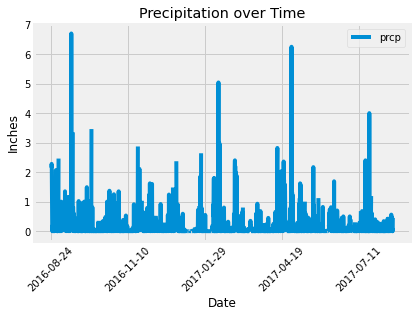

In [13]:
ax = prcp_df.plot(kind='line', title='Precipitation over Time', rot=45)
ax.set_xlabel('Date')
ax.set_ylabel('Inches')

# Exploratory Station Analysis

In [14]:
# Design a query to calculate the total number stations in the dataset
unique_stations = session.query(station).distinct().count()
print(f'Number of unique stations: {unique_stations}')

Number of unique stations: 9


In [16]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
most_active_stations = session.query(measurement.station, func.count(measurement.station)).\
            group_by(measurement.station).\
            order_by(func.count(measurement.station).desc()).all()


print(f'Most Active Station: {most_active_stations[0][0]}, Measurement Count: {most_active_stations[0][1]}')

Most Active Station: USC00519281, Measurement Count: 2772


In [108]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station = most_active_stations[0][0]

# mas = "most active station"
mas_summary = session.query(func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)).filter(measurement.station == most_active_station).all()

print(f'Station: {most_active_station} Low: {mas_summary[0][0]} High: {mas_summary[0][1]} Avg: {mas_summary[0][2]}')

Station: USC00519281 Low: 54.0 High: 85.0 Avg: 71.66378066378067


In [114]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_query = session.query(measurement.date, measurement.tobs).filter(measurement.date > year_ago).filter(measurement.station == most_active_station)
temp_df = pd.read_sql(temp_query.statement, conn)

Text(0.5, 0, 'Temperature (F)')

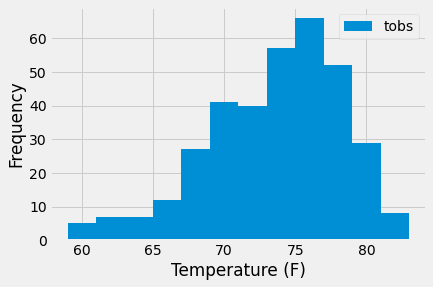

In [116]:
ax = temp_df.plot.hist(by='tobs', bins=12)
ax.set_xlabel('Temperature (F)')

# Close session

In [117]:
# Close Session
session.close()